# 様々な回帰手法の実践

scikit-learnのbostonデータセットを用いた重回帰、多項式回帰の実践を行う

In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# bostonデータのインスタンス生成
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#説明変数→さきほどの変数の中のNEDV以外
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
#目的変数→住宅価格の中央値（NEDV）、最初の50個を出力
boston.target[:50]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4])

## データの観察

In [7]:
# PandasのDataFrame型に変換
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# 目的変数もDataFrameに変換
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
# 説明変数と目的変数のDataFrameを結合する
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# 基本統計量の出力
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


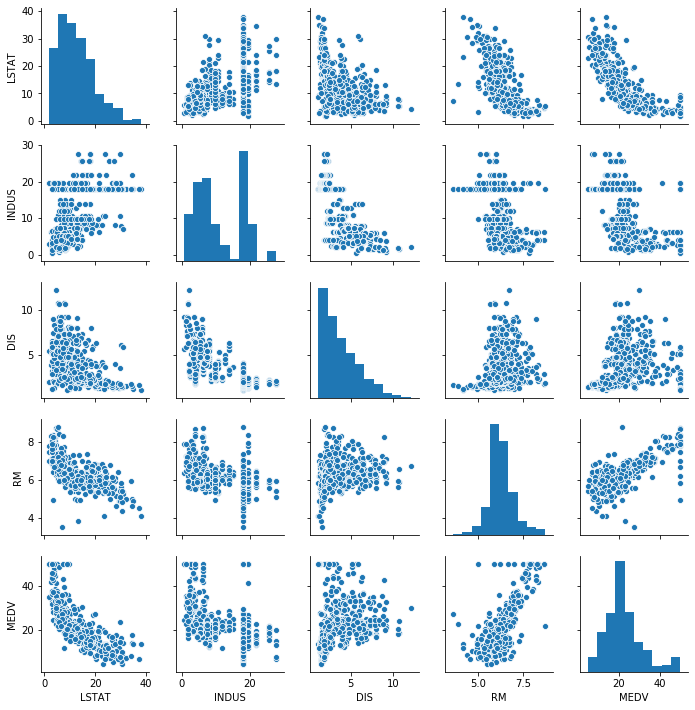

In [11]:
# 散布図行列を出力（時間がかかります）
import seaborn as sns
sns.pairplot(df.loc[:, ['LSTAT', 'INDUS', 'DIS', 'RM', 'MEDV']], height=2.0)
plt.show()

In [12]:
# 相関係数行列
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


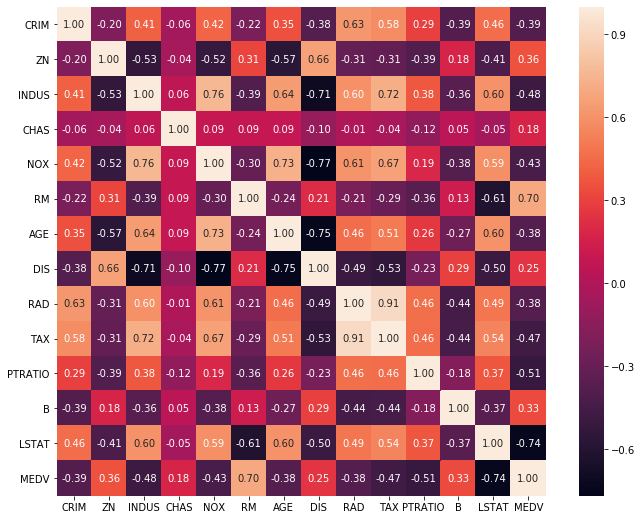

In [13]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot：数値を表示するか
# square：正方形で表示するか
# fmt：表示する数値の型（.2f→float型で小数点以下２桁表示）
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

今回はLSTATとRMの説明変数を用いて重回帰分析を行う

## 前処理

In [14]:
# DataFrameの.valuesメソッドでarrayに変換
X = df.loc[:, ['LSTAT', 'RM']].values
X

array([[4.98 , 6.575],
       [9.14 , 6.421],
       [4.03 , 7.185],
       ...,
       [5.64 , 6.976],
       [6.48 , 6.794],
       [7.88 , 6.03 ]])

In [15]:
y = df.loc[:, ['MEDV']].values
y[:10]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [16]:
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# 分割されたデータの個数を確認
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(506, 2)
(506, 1)
(404, 2)
(404, 1)
(102, 2)
(102, 1)


## 重回帰モデル

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# 関数の係数を出力
lr.intercept_

array([-1.26252868])

In [20]:
lr.coef_

array([[-0.65494879,  5.10906846]])

重回帰モデルは以下の関数となる
$$y = -1.26 - 0.655x_1 + 5.11x_2$$

## モデルの評価

In [21]:
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

train: 0.662
test : 0.541


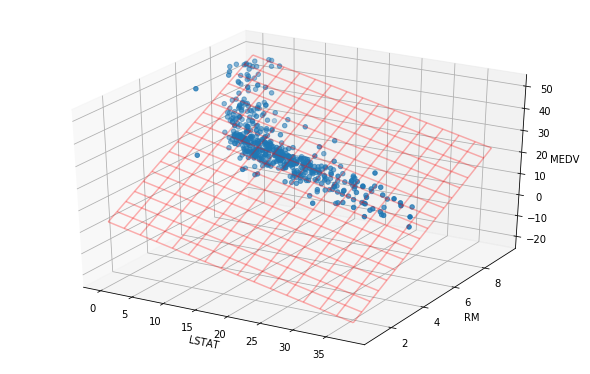

In [22]:
# mpl_toolkitsを用いて3次元の描画する
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure(figsize=(8, 5)))

# (x, y , z)
ax.scatter3D(df['LSTAT'], df['RM'], df['MEDV'])

# 関数の指定
X_grid, Y_grid = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 平面の描画
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# ラベル
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

# 多項式回帰

In [23]:
lstat = df.loc[:, ['LSTAT']].values
rm = df.loc[:, ['RM']].values
y = df.loc[:, ['MEDV']].values

In [24]:
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(lstat, y, test_size = 0.2, random_state = 0)

## 単回帰

In [25]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(lstat_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

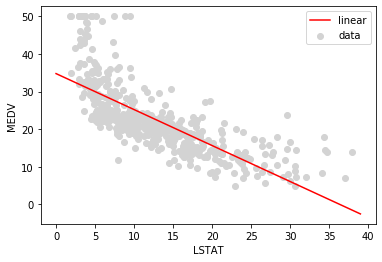

In [26]:
# データの散布図表示
plt.scatter(lstat, y, color='lightgray', label='data')
x = np.arange(0, 40, 1)[:, np.newaxis]

# 直線の描画
plt.plot(x, model_lin.predict(x), color='red', label='linear')
# ラベルを表示
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 凡例
plt.legend(loc = 'upper right')

plt.show()

## 多項式回帰

In [27]:
# 変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
lstat_quad = quad.fit_transform(lstat)
lstat_quad

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [28]:
## データの分割
lstat_quad_train, lstat_quad_test, y_train, y_test = train_test_split(lstat_quad, y, test_size = 0.2, random_state = 0)

In [29]:
model_quad = LinearRegression()
model_quad.fit(lstat_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

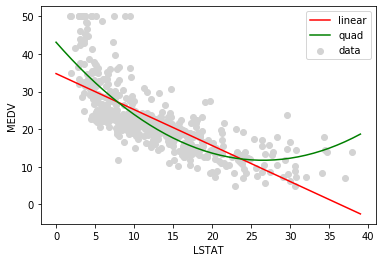

In [30]:
#データの散布図を表示
plt.scatter(lstat, y, color='lightgray', label='data')

# 直線の描画
plt.plot(x, model_lin.predict(x), color='red', label='linear')

# 変数変換する
x_quad = quad.fit_transform(x)

# 回帰曲線を表示（2次関数）
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')

# ラベルを表示
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 凡例を表示
plt.legend(loc = 'upper right')

# 上記の内容でグラフを表示
plt.show()

## ３次関数での多項式回帰

In [31]:
# 変数変換

cubic = PolynomialFeatures(degree=3)

lstat_cubic = cubic.fit_transform(lstat)
lstat_cubic

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       ...,
       [  1.      ,   5.64    ,  31.8096  , 179.406144],
       [  1.      ,   6.48    ,  41.9904  , 272.097792],
       [  1.      ,   7.88    ,  62.0944  , 489.303872]])

In [32]:
#データ分割
lstat_cubic_train, lstat_cubic_test, _, _ = train_test_split(lstat_cubic, y, test_size = 0.2, random_state = 0)

In [33]:
#モデルの学習
model_cubic = LinearRegression()
model_cubic.fit(lstat_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

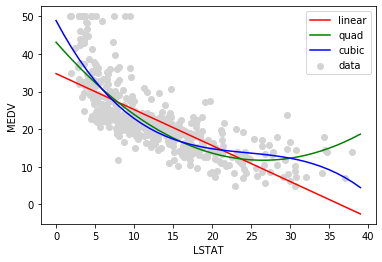

In [34]:
plt.scatter(lstat, y, color='lightgray', label='data') 
plt.plot(x, model_lin.predict(x), color='red', label='linear')
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')
x_cubic = cubic.fit_transform(x)
plt.plot(x, model_cubic.predict(x_cubic), color='blue', label='cubic')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()

### レポート課題

#### （１）上記のモデルを３パターン以上それぞれ決定係数を算出してください。

In [39]:
#線形回帰
print('train: %.3f' % model_lin.score(lstat_train, y_train)) 
print('test : %.3f' % model_lin.score(lstat_test, y_test))

#2次関数
print('train: %.3f' % model_quad.score(lstat_quad_train, y_train)) 
print('test : %.3f' % model_quad.score(lstat_quad_test, y_test))

#3次関数
print('train: %.3f' % model_cubic.score(lstat_cubic_train, y_train)) 
print('test : %.3f' % model_cubic.score(lstat_cubic_test, y_test))

# それ以外でも試したいものがあればご自由に
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

train: 0.571
test : 0.431
train: 0.669
test : 0.523
train: 0.685
test : 0.543
train: 0.662
test : 0.541


#### （２）LSTATを用いたMEDVの予測に関して用いるモデルを選び、その数式を記せ。# 線形回帰

In [37]:
# 定数項の出力（.intercept_と.coef_を用いる）
model_cubic.intercept_

array([48.86900118])

In [38]:
model_cubic.coef_

array([[ 0.00000000e+00, -3.91539295e+00,  1.52029855e-01,
        -2.07252738e-03]])

数式の記述
$$𝑦=48.9−3.92𝑥+1.52𝑥^2−2.07𝑥^3$$

#### （３）モデルを選んだ理由とその根拠を述べよ。（評価指標や可視化の結果などを基に述べると良い）

（日本語で100文字以上：English:200 char over）

調べられた１次関数・２次関数・３次関数での多項式回帰・重回帰モデルのうち、決定係数から、訓練データにおいてもテストデータにおいても、３次関数での多項式回帰がデータのモデルへの当てはまりの良さが最も良いことが示されているから。また、下記のようにグラフの可視化を行っても、３次関数での多項式回帰がデータのモデルへの当てはまりが良く見られるから。


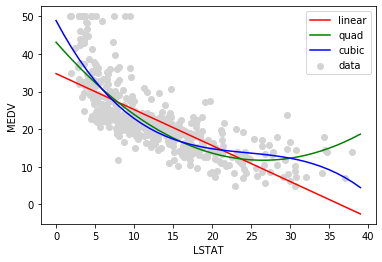

In [34]:
plt.scatter(lstat, y, color='lightgray', label='data') 
plt.plot(x, model_lin.predict(x), color='red', label='linear')
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')
x_cubic = cubic.fit_transform(x)
plt.plot(x, model_cubic.predict(x_cubic), color='blue', label='cubic')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()

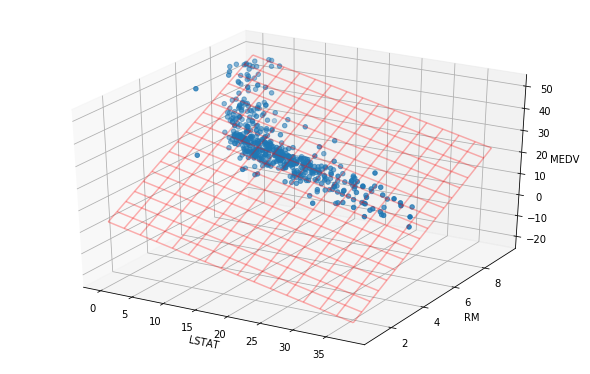

In [22]:
# mpl_toolkitsを用いて3次元の描画する
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure(figsize=(8, 5)))

# (x, y , z)
ax.scatter3D(df['LSTAT'], df['RM'], df['MEDV'])

# 関数の指定
X_grid, Y_grid = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 平面の描画
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# ラベル
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

参考

In [40]:
model_quad.intercept_

array([43.1090092])

In [41]:
model_quad.coef_

array([[ 0.        , -2.36696305,  0.04463347]])

In [42]:
model_lin.intercept_

array([34.76519272])

In [43]:
model_lin.coef_

array([[-0.95648761]])